# Tutorial / protocol 2 from Nature protocol paper:

In [11]:
import cometspy as c
from cobra.io import load_model
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# load models and perform knockout

m1 = load_model("iJO1366")
m2 = m1.copy()

m1.genes.b0759.knock_out()
m2.reactions.LCTStex.knock_out()

In [16]:
# change model ids
m1.id = "galE_KO"
m2.id = "LCTStex_KO"

# make comets models
m1_c = c.model(m1)
m2_c = c.model(m2)

In [17]:
# set initial population

initial_pop = 1.e-3

m1_c.initial_pop = [0,0,initial_pop]
m2_c.initial_pop = [0,0,initial_pop]

In [18]:
# open the exhange reactions - exhanges should be controlled by MM kinetics

m1_c.open_exchanges()
m2_c.open_exchanges()

In [19]:
# run pFBA

m1_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
m2_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"

In [20]:
# create a 1x1 layout

layout = c.layout([m1_c, m2_c])

In [21]:
# set metabolite availability

unlimited_mets = ['ca2_e', 'cl_e', 'co2_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'h2o_e', 'k_e', 'mg2_e', 'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e','o2_e', 'pi_e', 'sel_e', 'slnt_e', 'so4_e', 'tungs_e', 'zn2_e']
for met in unlimited_mets:
    layout.set_specific_metabolite(met, 1000.)
layout.set_specific_metabolite("lcts_e", 1.)

In [22]:
# set refresh of metabolites (chemostat)

dilution_rate = 0.1 # / hr
for met in unlimited_mets:
    layout.set_specific_refresh(met, 1000. * dilution_rate) # 100 mmol / hour
layout.set_specific_refresh("lcts_e", 1. * dilution_rate) # 0.1 mmol / hour

In [23]:
# create params object

params = c.params()

In [24]:
# set cell death and metabolite dilution

params.set_param("deathRate", dilution_rate)
params.set_param("metaboliteDilutionRate", dilution_rate)

In [25]:
# set grid size specifications and km vmax defaults

params.set_param("spaceWidth", 0.1)
params.set_param("defaultVmax", 15.)
params.set_param("defaultKm", 0.0001)

In [26]:
# set simulation parameters

params.set_param("timeStep", 0.1) # hours
params.set_param("maxSpaceBiomass", 10.)
params.set_param("maxCycles", 300)

In [28]:
# set logging parameters

params.set_param("writeFluxLog", True)
params.set_param("writeMediaLog", True)
params.set_param("FluxLogRate", 1)
params.set_param("MediaLogRate", 1)

In [29]:
# create simultion object
sim = c.comets(layout, params)

In [30]:
# run simulation

sim.run()


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


Text(0, 0.5, 'biomass (gDW)')

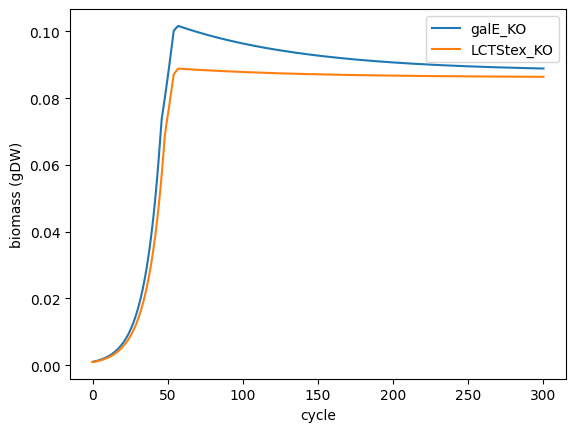

In [32]:
# plot biomass

sim.total_biomass.plot(x = "cycle")
plt.ylabel("biomass (gDW)")

Text(0, 0.5, 'mmol')

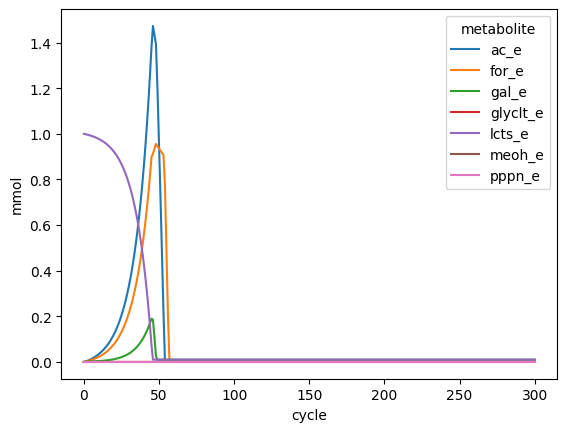

In [34]:
# plot metabolites

media = sim.get_metabolite_time_series(upper_threshold = 900.)
media.plot(x = "cycle")
plt.ylabel("mmol")

In [35]:
# get the largest reaction fluxes

LCTStex_KO_flux = sim.get_species_exchange_fluxes("LCTStex_KO", threshold = 5.)
galE_KO_flux = sim.get_species_exchange_fluxes("galE_KO", threshold = 5.)

In [36]:
#drop fluxes we do not care about

ignoreable_exchanges = ["EX_o2_e", "EX_h_e", "EX_h2o_e", "EX_co2_e"]
LCTStex_KO_flux = LCTStex_KO_flux.drop(ignoreable_exchanges, axis = 1)
galE_KO_flux = galE_KO_flux.drop(ignoreable_exchanges, axis = 1)

<Axes: title={'center': 'LCTStex_KO'}, xlabel='cycle'>

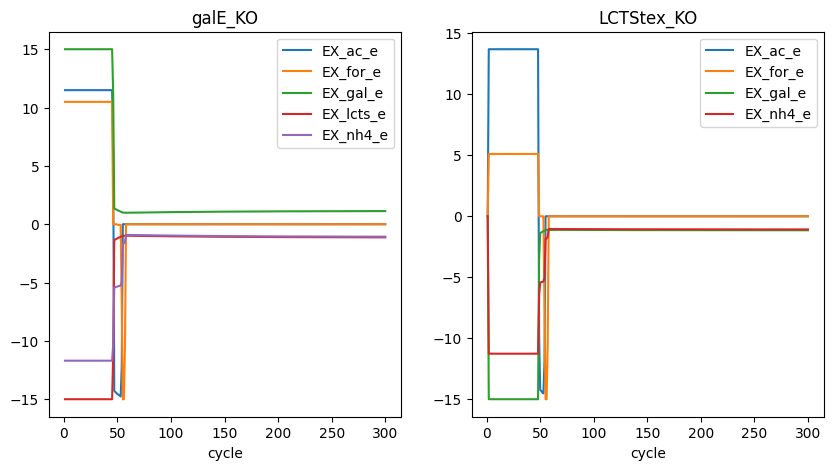

In [37]:
# plot fluxes over time

plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1,2)
galE_KO_flux.plot(x = "cycle", ax = ax[0], title = "galE_KO")
LCTStex_KO_flux.plot(x = "cycle", ax = ax[1], title = "LCTStex_KO")

# Simulating the RA case:

## initializing model

In [38]:
import cometspy as c
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# load models
cal2 = read_sbml_model("../GEMs/CAL2.xml")
sal9 = read_sbml_model("../GEMs/SAL9.xml")
mam2 = read_sbml_model("../GEMs/MAM2.xml")

In [41]:
# make comets models
cal2_c = c.model(cal2)
sal9_c = c.model(sal9)
mam2_c = c.model(mam2)

# set initial population
initial_pop = 1.e-3

cal2_c.initial_pop = [0,0,initial_pop]
sal9_c.initial_pop = [0,0,initial_pop]
mam2_c.initial_pop = [0,0,initial_pop]

# open the exhange reactions - exhanges should be controlled by MM kinetics
cal2_c.open_exchanges()
sal9_c.open_exchanges()
mam2_c.open_exchanges()

# set to run pFBA

cal2_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
sal9_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"
mam2_c.obj_style="MAX_OBJECTIVE_MIN_TOTAL"

## initializing layout

In [45]:
# create a 1x1 layout

layout = c.layout([cal2_c, sal9_c, mam2_c])

In [47]:
# set metabolite availability

unlimited_mets = ['ca2_e', 'cl_e', 'co2_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e','h_e', 'h2o_e', 'k_e', 'mg2_e', 
                  'mn2_e', 'mobd_e', 'na1_e', 'nh4_e', 'ni2_e','o2_e', 'pi_e', 'sel_e', 'slnt_e', 'so4_e', 'tungs_e', 'zn2_e']

for met in unlimited_mets:
    layout.set_specific_metabolite(met, 1000.)
    
layout.set_specific_metabolite("glc__D_e", 1.)

# set refresh of metabolites (chemostat)

dilution_rate = 0.1 # / hr
for met in unlimited_mets:
    layout.set_specific_refresh(met, 1000. * dilution_rate) # 100 mmol / hour
layout.set_specific_refresh("glc__D_e", 1. * dilution_rate) # 0.1 mmol / hour

## initializing parameters

In [49]:
# create params object

params = c.params()

# set cell death and metabolite dilution #NOTE: I think this should be removed - no basis for this in paper right?
params.set_param("deathRate", dilution_rate)
params.set_param("metaboliteDilutionRate", dilution_rate)

# set grid size specifications and km vmax defaults
params.set_param("spaceWidth", 0.1)
params.set_param("defaultVmax", 15.)
params.set_param("defaultKm", 0.0001)

# set simulation parameters
params.set_param("timeStep", 0.1) # hours
params.set_param("maxSpaceBiomass", 10.)
params.set_param("maxCycles", 300)

# set logging parameters
params.set_param("writeFluxLog", True)
params.set_param("writeMediaLog", True)
params.set_param("FluxLogRate", 1)
params.set_param("MediaLogRate", 1)

## Running simulation

In [54]:
# create simultion object
sim = c.comets(layout, params)

In [55]:
# run simulation
sim.run() #fyi: takes about 2 min to run


Running COMETS simulation ...


/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/andreastallvik/Projects/BIOTBT3900/venv-comets/lib/python3.10/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lin

Done!


## visualizing output

Text(0, 0.5, 'biomass (gDW)')

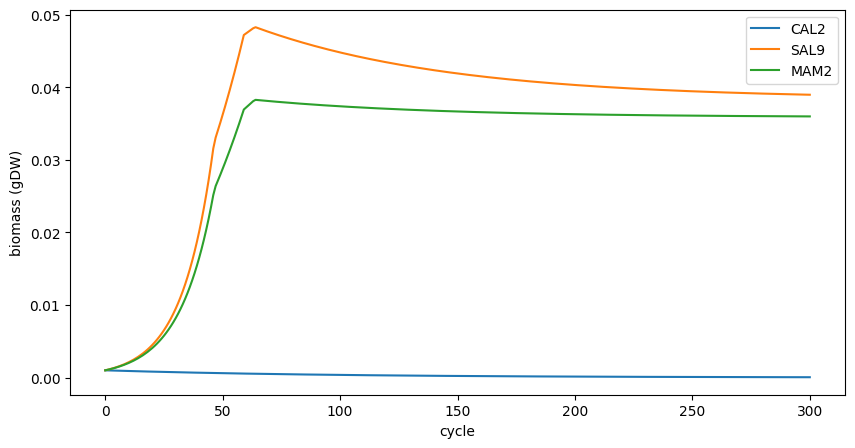

In [56]:
# plot biomass

sim.total_biomass.plot(x = "cycle")
plt.ylabel("biomass (gDW)")

Text(0, 0.5, 'mmol')

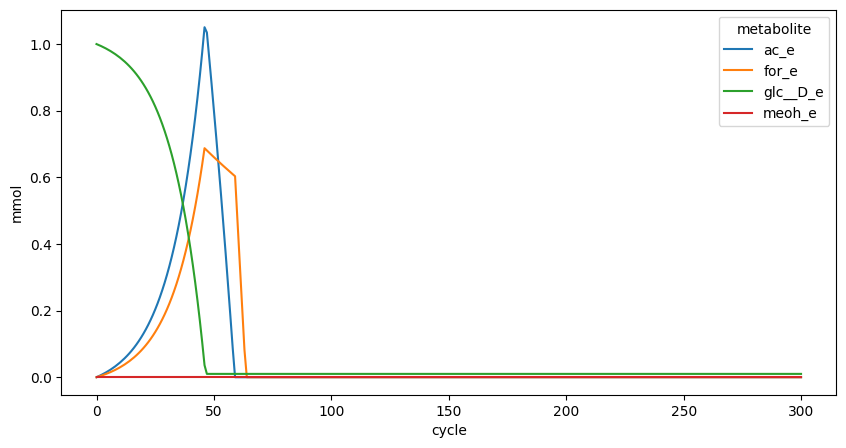

In [57]:
# plot metabolites

media = sim.get_metabolite_time_series(upper_threshold = 900.)
media.plot(x = "cycle")
plt.ylabel("mmol")

<Axes: title={'center': 'MAM2'}, xlabel='cycle'>

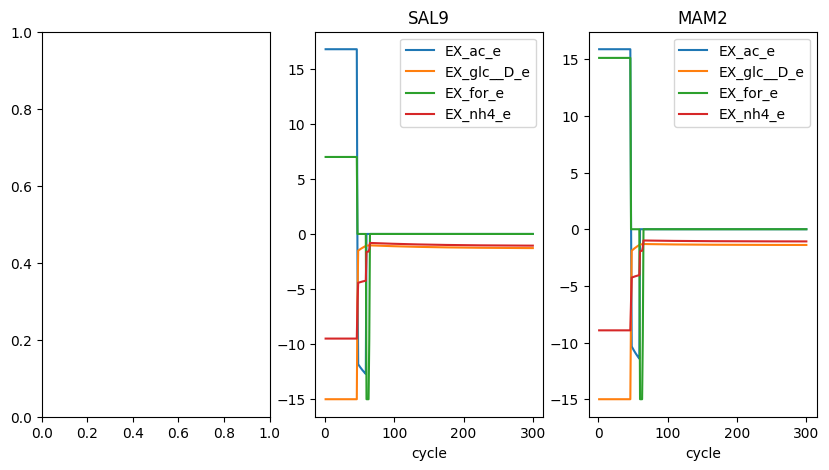

In [74]:
# get the largest reaction fluxes
CAL2_flux = sim.get_species_exchange_fluxes("CAL2", threshold = 5.)
SAL9_flux = sim.get_species_exchange_fluxes("SAL9", threshold = 5.)
MAM2_flux = sim.get_species_exchange_fluxes("MAM2", threshold = 5.)

#drop fluxes we do not care about
ignoreable_exchanges = ["EX_o2_e", "EX_h_e", "EX_h2o_e", "EX_co2_e"]
#CAL2_flux = CAL2_flux.drop(ignoreable_exchanges, axis = 1)
SAL9_flux = SAL9_flux.drop(ignoreable_exchanges, axis = 1)
MAM2_flux = MAM2_flux.drop(ignoreable_exchanges, axis = 1)

# plot fluxes over time
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1,3)
#CAL2_flux.plot(x = "cycle", ax = ax[0], title = "CAL2")
SAL9_flux.plot(x = "cycle", ax = ax[1], title = "SAL9")
MAM2_flux.plot(x = "cycle", ax = ax[2], title = "MAM2")